# HTML tree structure
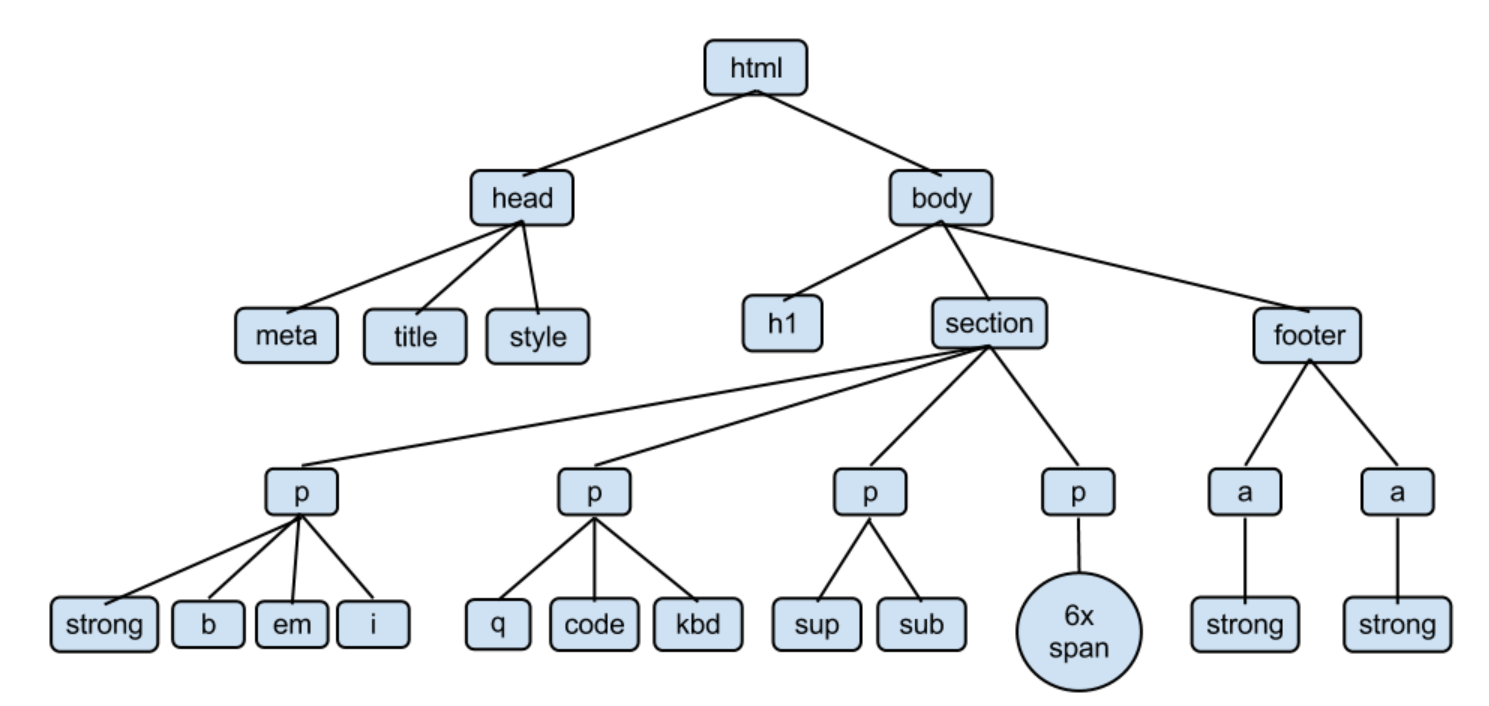

In [1]:
#consider an html doc
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')

In [2]:
soup.head

<head><title>The Dormouse's story</title></head>

In [3]:
soup.title

<title>The Dormouse's story</title>

In [5]:
soup.body

<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body>

In [6]:
soup.body.b  #fetch first b tag within body 

<b>The Dormouse's story</b>

In [7]:
soup.head.b # in head tag there is no b tag, nothing is returned 

In [8]:
soup.body.p # first paragraph

<p class="title"><b>The Dormouse's story</b></p>

In [9]:
soup.body.a # first anchor tag 

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [11]:
#to fetch ttributes within tag mention attribute name within []
soup.body.a['class']

['sister']

In [12]:
soup.body.a['href'] # fetches hyper link reference value

'http://example.com/elsie'

In [13]:
soup.body.a['id'] # fetch id value

'link1'

In [14]:
soup.body.a.string # fetch string part within anchor

'Elsie'

In [15]:
soup.a # to get first anchor tag, I need not to mention body 

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [17]:
soup.p

<p class="title"><b>The Dormouse's story</b></p>

In [19]:
# to get all tags use find_all() and pass tag name as parameter
soup.find_all('p')

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [20]:
soup.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

### Going down
1. .contents
2. .children
3. .string
4. .stripped_string

### .contents vs .children
- content return tag's children in form of list
- List which is returned using .contents is stored in memory.
- .children returns iterable object. 
- For huge html page, children method is useful as data is not stored in memory and to fetch the data I can iterate over using for loop or next().

In [21]:
head_tag= soup.head

In [22]:
head_tag

<head><title>The Dormouse's story</title></head>

In [24]:
head_tag.contents

[<title>The Dormouse's story</title>]

In [25]:
type(head_tag.contents) # data type of .contents is list

list

In [27]:
head_tag.children

In [28]:
print(head_tag.children)

In [29]:
type(head_tag.children)

list_iterator

In [30]:
#to fetch the contents
head_tag.contents[0]

<title>The Dormouse's story</title>

In [31]:
head_tag.contents[1] #there is only 1 item in the list 

IndexError: list index out of range

In [32]:
#to fetch title using contents, I can assign 1st element in list (index 0) to a variable 
title_tag= head_tag.contents[0]
title_tag


<title>The Dormouse's story</title>

In [34]:
type(title_tag) #this variable is tag object 

bs4.element.Tag

In [33]:
title_tag.contents # now apply .contents on title_tag to fetch title

["The Dormouse's story"]

In [35]:
type(title_tag.contents) 
# as .contents is applied data type of title_tag var is changed from tag to list 

list

In [36]:
#child of beautifulsoup object
soup.children

In [37]:
print(soup.children)

In [38]:
soup.contents

['\n',
 <html><head><title>The Dormouse's story</title></head>
 <body>
 <p class="title"><b>The Dormouse's story</b></p>
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>
 <p class="story">...</p>
 </body></html>]

In [41]:
len(soup.contents)

2

In [43]:
soup.contents[1].name

'html'

In [44]:
soup.contents[0].name

In [45]:
#trying .contents on Navigablestring 
# title_tag has string, fetch string and assign it to variable

text= title_tag.contents[0]

In [46]:
text

"The Dormouse's story"

In [47]:
type(text)
# type of text is navigable string

bs4.element.NavigableString

In [48]:
text.contents
# If I apply .contents over navigable string, it returns error as navogable string cant 
#contain anything like other objects soup, tag

AttributeError: 'NavigableString' object has no attribute 'contents'

In [51]:
# to iterate over children 
for child in title_tag.children:
    print(child)

The Dormouse's story


### Descendants
- .contents and .children only fetch immediate children
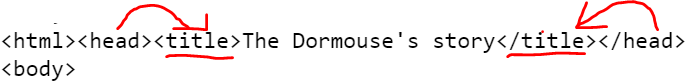
- As shown here, head tag's child is title. so whenever I apply .contents or .children title tag is returned
- title tag has child-> The Dormouse's story(string). It also means string is also child of head tag.
- .descendants is used to get all the children recursively. child-> child's child and so on 

In [52]:
for child in head_tag.descendants:
    print(child)
#this return 2 children <title> and title's child Navigablestring

<title>The Dormouse's story</title>
The Dormouse's story


In [53]:
#let's again see .children
for child in head_tag.children:
    print(child)
    #.children retrns just immediate child

<title>The Dormouse's story</title>


In [54]:
for child in head_tag.contents:
    print(child)
    
# even .contents return just immediate child 

<title>The Dormouse's story</title>


In [55]:
len(list(soup.children)) # checking length of child (just 1)

2

In [56]:
len(list(soup.descendants)) # using desendants eahc child is fetched len=26

27

### .string
- if tag has navigable string, then it can be fetched using .string

In [57]:
head_tag.string

"The Dormouse's story"

### .strings and stripped_strings
- if there are more than 1 tag, I can fetch using .strings. 
- applying .strings returns genrator, which in turn can e fetched using for loop or next()

In [59]:
soup.strings

<generator object Tag._all_strings at 0x00000263231AE270>

In [60]:
for string in soup.strings:
    print(string)



The Dormouse's story




The Dormouse's story


Once upon a time there were three little sisters; and their names were

Elsie
,

Lacie
 and

Tillie
;
and they lived at the bottom of a well.


...




In [61]:
# Python repr() Function returns a printable representation of an object in Python.

for string in soup.strings:
    print(repr(string))

'\n'
"The Dormouse's story"
'\n'
'\n'
"The Dormouse's story"
'\n'
'Once upon a time there were three little sisters; and their names were\n'
'Elsie'
',\n'
'Lacie'
' and\n'
'Tillie'
';\nand they lived at the bottom of a well.'
'\n'
'...'
'\n'


In [62]:
# .strings have multiple whitespaces, this can be avoided using stripped_strings.
for string in soup.stripped_strings:
    print(repr(string))
    
#when I apply soup.strings, there are multiple strings of whitespaces as shown above. 
# stripped_string remove all these strings of whitespaces and also beginning and end of string
#is removed like new line \n 

"The Dormouse's story"
"The Dormouse's story"
'Once upon a time there were three little sisters; and their names were'
'Elsie'
','
'Lacie'
'and'
'Tillie'
';\nand they lived at the bottom of a well.'
'...'


## Going up: .parent, .parents
## .parent

In [63]:
title_tag = soup.title
title_tag

<title>The Dormouse's story</title>

In [64]:
title_tag.parent
#immediate parent is displayed

<head><title>The Dormouse's story</title></head>

In [66]:
title_tag.string

"The Dormouse's story"

In [67]:
title_tag.string.parent
#parent of the string is tile tag

<title>The Dormouse's story</title>

In [68]:
html_tag = soup.html
type(html_tag.parent)

# parent of html is bs

bs4.BeautifulSoup

In [70]:
print(soup.parent) # parent is beautiful soup is defined as none 

None


### .parents
- This returns parents of tag defined. (it also includes parent's parents)

In [71]:
link = soup.a
link

# fetch anchor tags and save in variable link

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [73]:
type(link) # datatype of link is tag object

bs4.element.Tag

In [74]:
link.parents # applying .parents on tag returns object

<generator object PageElement.parents at 0x00000263231AEBA0>

In [72]:
#iter
for parent in link.parents:
    print(parent.name)

p
body
html
[document]


## Going sideways

1. .nextsibling
2. .previoussibling
3. .nextsiblings
4. .previoussiblings

### .next_sibling and .previous_sibling

- these helps to navigate between page elements on same level 

In [76]:
#consider a doc
sibling_soup = BeautifulSoup("<a><b>text1</b><c>text2</c></a>", 'html.parser')
print(sibling_soup.prettify())

<a>
 <b>
  text1
 </b>
 <c>
  text2
 </c>
</a>


In [77]:
sibling_soup.b.next_sibling
# b has: <b>text1</b>-> its sibling is c text2

<c>text2</c>

In [78]:
sibling_soup.c.previous_sibling

<b>text1</b>

In [79]:
# trying to get previous_sibling of b, which doesnt exist
sibling_soup.b.previous_sibling

In [80]:
print(sibling_soup.b.previous_sibling)

None


In [81]:
print(sibling_soup.c.next_sibling)

None


In [82]:
# text is also a tag(navigablestring) text1 and text 2 are not each other's sibling 
#as they do not share same parent

sibling_soup.b.string


'text1'

In [83]:
print(sibling_soup.b.string.next_sibling)

None


In [84]:
#in html doc
# nextsibling of <a> is not 2nd <a> tag
link = soup.a
link

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [85]:
link.next_sibling #next sibling of <a> tag is comma and new line ,\n which separates 2 <a> tags

',\n'

In [86]:
link.next_sibling.next_sibling
# next_sibling of next-sibling: 1stanchor <a>'s next is comma&newline, its sibling is next <a>tag

<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>

### .next_siblings and .previous_siblings
- list of next and previous siblings.

In [87]:
for sibling in soup.a.next_siblings:
    print(repr(sibling))

',\n'
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
' and\n'
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>
';\nand they lived at the bottom of a well.'


In [88]:
for sibling in soup.find(id="link3").previous_siblings:
    print(repr(sibling))

' and\n'
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
',\n'
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
'Once upon a time there were three little sisters; and their names were\n'


### Going back and forth 
1. .nextelement
2. .previouselement
3. .nextelelements
4. .previouselements

### .next_element and .previous_element

In [100]:
# <html><head><title>The Dormouse's story</title></head>
# <p class="title"><b>The Dormouse's story</b></p>

html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

In [101]:
last_a_tag = soup.find("a", id="link3")
last_a_tag
#returns 3rd sister tillie 

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

In [102]:
last_a_tag.next_sibling # Tillie's next sibling which is comma,newline, SEMICOLON and text string

';\nand they lived at the bottom of a well.'

In [103]:
last_a_tag.next_element
#.next_element of that <a> tag, the thing that was parsed immediately after the <a> tag
# this is not text string, it is rather word Tillie
# parser will pass <a>, Tillie then </a> then semicolon and at atlast text, 
#so next element is Tillie

'Tillie'

In [104]:
last_a_tag.previous_element 
# <a> tag, go backwards it would be: \n new line and word "and"

' and\n'

In [105]:
last_a_tag.previous_element.next_element # find previous elemen: and & \n (from last code)
# It's next element is next <a> tag

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

In [106]:
### .next_elements and .previous_elements

In [107]:
for element in last_a_tag.next_elements:
    print(repr(element))
    
    # prints all next elements after last <a> tag

'Tillie'
';\nand they lived at the bottom of a well.'
'\n'
<p class="story">...</p>
'...'
'\n'


In [108]:
for element in last_a_tag.previous_elements:
    print(repr(element))
    
    #prints all the previos elements of last <a> tag

' and\n'
'Lacie'
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
',\n'
'Elsie'
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
'Once upon a time there were three little sisters; and their names were\n'
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
'\n'
"The Dormouse's story"
<b>The Dormouse's story</b>
<p class="title"><b>The Dormouse's story</b></p>
'\n'
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> an